# Load the packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

# Import the Data

In [28]:
# paths for the three dfs

df_jan_path = "/content/yellow_tripdata_2016-01.csv"
df_feb_path = "/content/yellow_tripdata_2016-02.csv"
df_mar_path = "/content/yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

In [29]:
df_jan

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=1,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...


In [30]:
# concat the three dataframes as one

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0)

### New york bounding box:
min_latitude = 40.60  
max_latitude = 40.85  
min_longitude = -74.05  
max_longitude = -73.70  

In [31]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70

In [32]:
# fare amount column
fare_amount = df_final["fare_amount"].compute()

# trip distance column
trip_distance = df_final["trip_distance"].compute()

In [33]:
fare_amount.shape[0] / 10000000

0.0628273

In [34]:
# percentile values for fare amount

percentile_values = np.arange(0.991,1.000, 0.001)
percentile_values

fare_amount.quantile(percentile_values)

,fare_amount
0.991,52.0
0.992,52.0
0.993,52.0
0.994,53.5
0.995,57.0
0.996,61.0
0.997,65.5
0.998,71.0
0.999,89.0
1.000,1442.0


In [35]:
max_fare_amount_val = fare_amount.quantile(percentile_values).iloc[-2].item()
min_fare_amount_val = 0.50

print(min_fare_amount_val)
print(max_fare_amount_val)

0.5
89.0


In [36]:
trip_distance.quantile(percentile_values)

,trip_distance
0.991,18.58
0.992,18.80
0.993,19.10
0.994,19.48
0.995,19.90
0.996,20.40
0.997,21.00
0.998,21.80
0.999,24.60
1.000,184.40


In [37]:
# percentile values for trip_distance

min_trip_distance_val = 0.25
max_trip_distance_val = trip_distance.quantile(percentile_values).iloc[-2].item()

print(min_trip_distance_val)
print(max_trip_distance_val)

0.25
24.6


# Remove Outliers from the Data

In [38]:
# select data points within the given ranges

df_final = df_final.loc[(df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) &
(df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) &
(df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) &
(df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [39]:
df_final = df_final.loc[(df_final["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) &
(df_final["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))]

## Location Based Columns

In [40]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude',
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=3,,,,
,float64,float64,float64,float64
,...,...,...,...
,...,...,...,...
,...,...,...,...


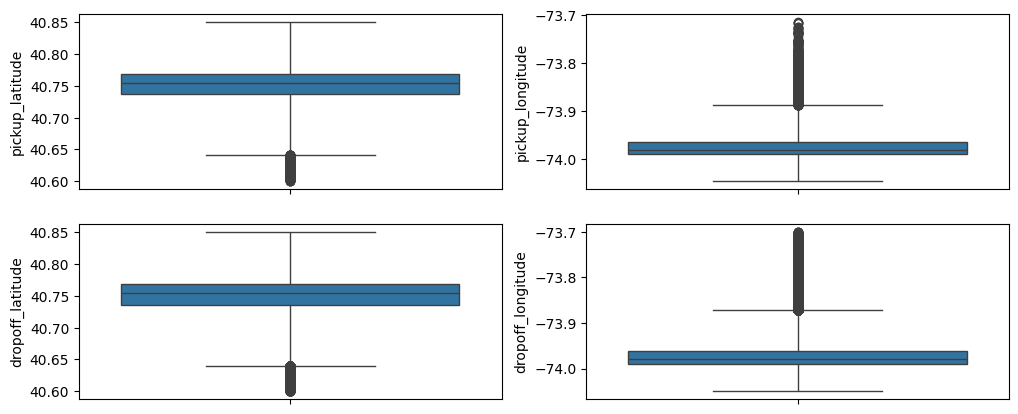

In [41]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i],whis=3)
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2],whis=3)

## Trip Distance

<Axes: ylabel='trip_distance'>

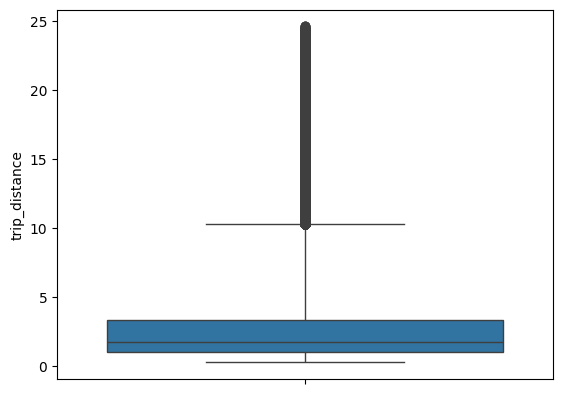

In [42]:
# boxplot for the trip distance

sns.boxplot(df_final.loc[:,"trip_distance"].compute(), whis=3)

## Fare Amount

<Axes: ylabel='fare_amount'>

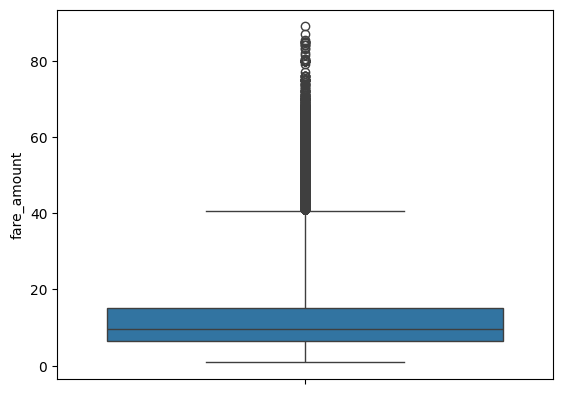

In [43]:
# boxplot for the fare amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute(), whis=3)

In [44]:
# Saving the dataframe directly to a CSV file in the current directory
pickup_coord_dataset.to_csv("location_data.csv", index=False)


['/content/location_data.csv/0.part',
 '/content/location_data.csv/1.part',
 '/content/location_data.csv/2.part']

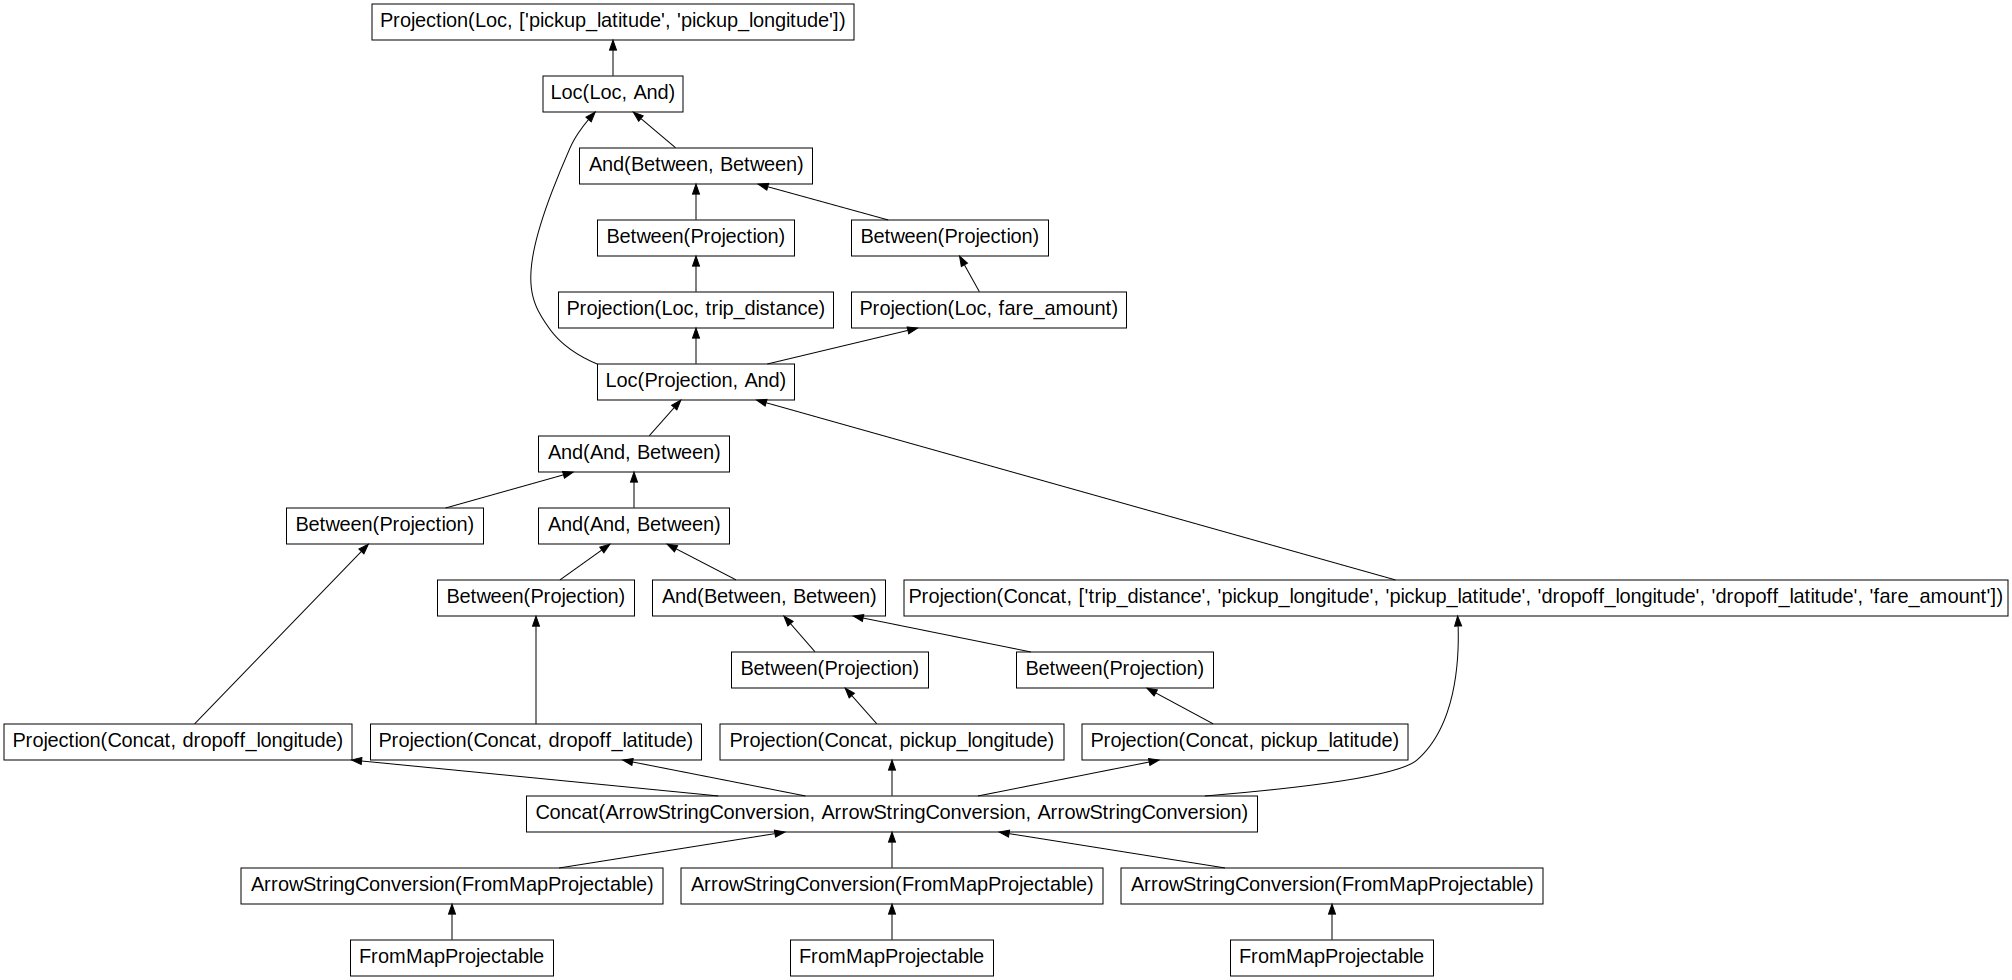

In [45]:
pickup_coord_dataset.visualize()

In [46]:
# form the dataset

pickup_coord_dataset = df_final.loc[:,['pickup_latitude','pickup_longitude']].compute()

print("Shape of the dataset is ", pickup_coord_dataset.shape)

Shape of the dataset is  (602669, 2)


In [47]:
pickup_coord_dataset

,pickup_latitude,pickup_longitude
0,40.734695,-73.990372
1,40.729912,-73.980782
2,40.679565,-73.984550
3,40.718990,-73.993469
4,40.781330,-73.960625
...,...,...
207586,40.741402,-74.001503
207587,40.774063,-73.874641
207588,40.778908,-73.977814
207589,40.791370,-73.976181


In [51]:
# Save with a new file name to avoid conflicts
pickup_coord_dataset.to_csv('/content/location_data_v2.csv', index=False)
